# Data analysis

## Exploratory data analysis

### Correlation of continuous variables

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
%matplotlib inline

In [38]:
cwd = os.getcwd()
print(cwd)

C:\Users\USER\Downloads\Holmusk_analysis


In [39]:
nan_df = pd.read_csv("C:/Users/USER/Downloads/Holmusk_analysis/nan_df.csv")
final_df = pd.read_csv("C:/Users/USER/Downloads/Holmusk_analysis/final_df.csv")

In [40]:
work_on = final_df

In [41]:
# Change some dtypes so we can plot them in heatmap
corr_df = work_on.copy(deep=True)
for column in corr_df.columns:
    if corr_df[column].dtype == "object":
        corr_df[column] = corr_df[column].astype(int)
corr_df.drop(columns = ["lab_1_bin", "lab_2_bin", "lab_3_bin"], inplace=True)

KeyError: "['lab_1_bin' 'lab_2_bin' 'lab_3_bin'] not found in axis"

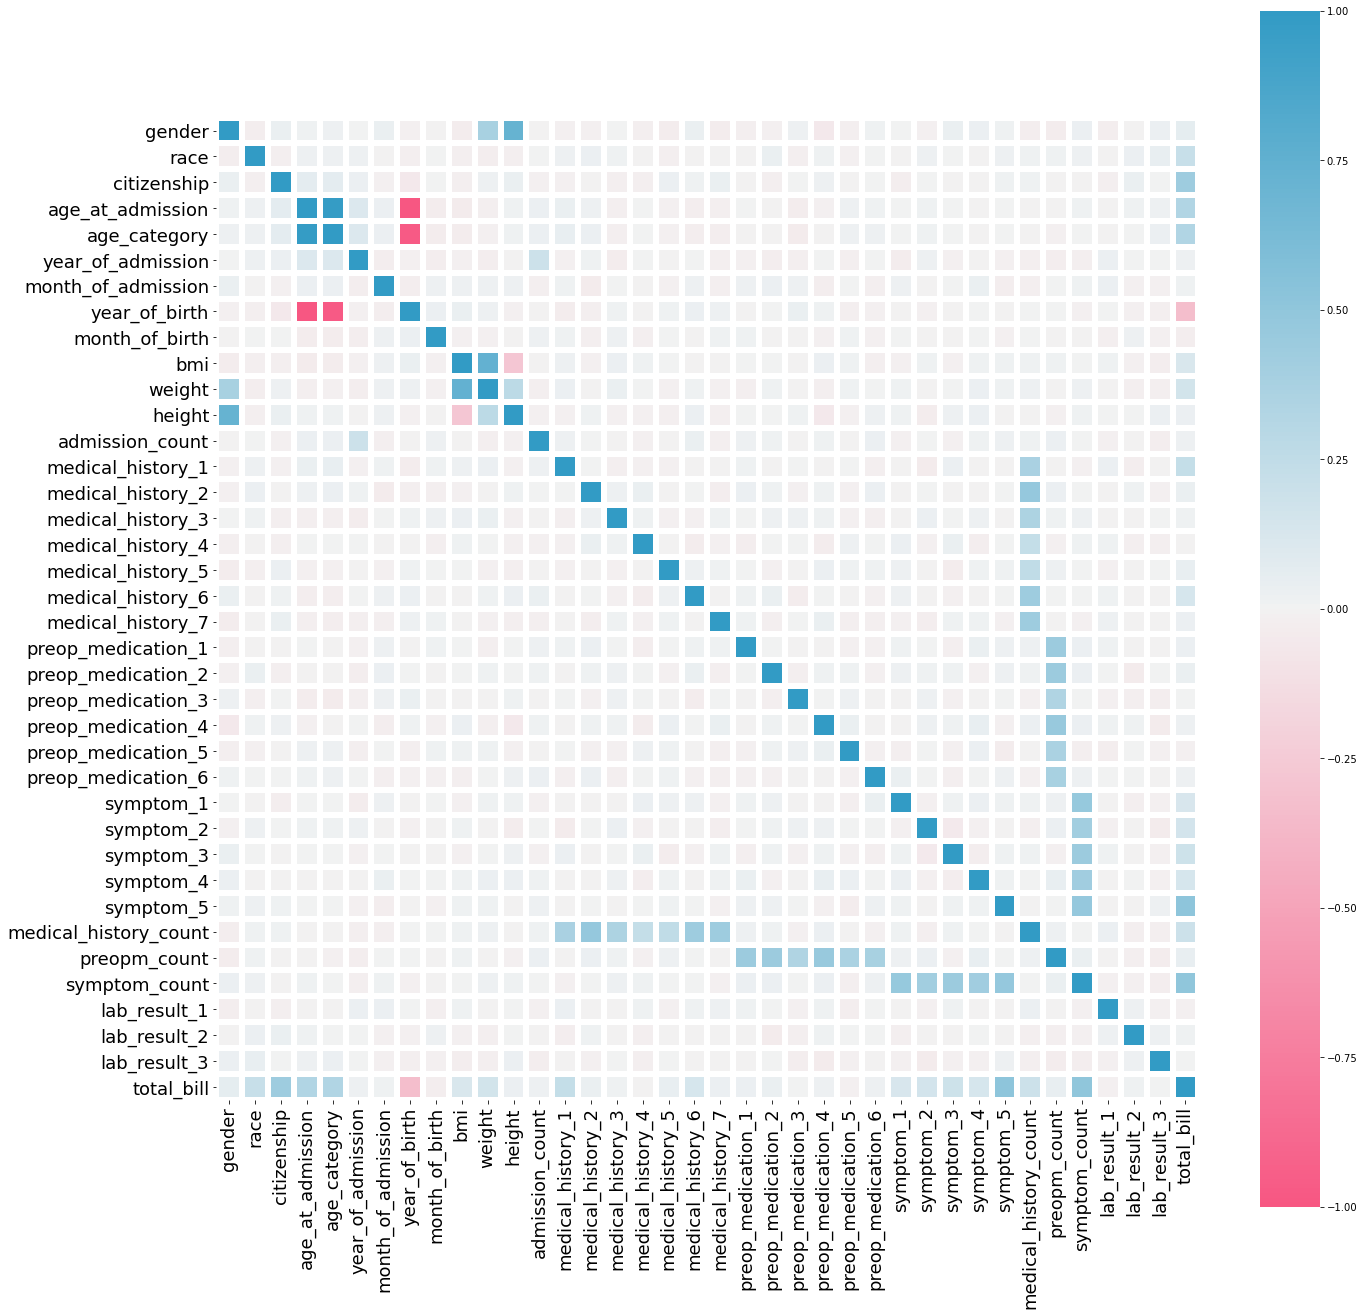

In [42]:
# Plot heat map of correlation
continuous = ["age_at_admission", "year_of_admission", "admission_count", "height", "weight", "bmi", 'medical_history_count', 
              'preopm_count', 'symptom_count', "lab_result_1", "lab_result_2", "lab_result_3", "total_bill"]
heat_df = work_on[continuous]

plt.figure(figsize = (22,22))
# Color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
corrMatrix = work_on.corr()

hm = sns.heatmap(corrMatrix, linewidths=5, cmap=cmap, square=True, vmin=-1, vmax=1)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=18)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=18)
# sns.set(rc = {'figure.figsize': (20,20)})
plt.xticks(rotation=90)
plt.show()

In [43]:
# Save the figure
hm.get_figure().savefig("Pictures/corrmap.png")

In [44]:
# Look at variables that have > 0.1 or < -0.1 correlation with total_bill
c = pd.DataFrame(corrMatrix["total_bill"])

for index, row in c.iterrows():
    bill = row["total_bill"]
    if abs(bill) > 0.1:
        print(f"{index}: correlation of {bill}")

race: correlation of 0.21788375599393664
citizenship: correlation of 0.4316408439170468
age_at_admission: correlation of 0.3312211096143922
age_category: correlation of 0.3314705351767786
year_of_birth: correlation of -0.33103482496510933
bmi: correlation of 0.1185615519386706
weight: correlation of 0.16010850522608217
medical_history_1: correlation of 0.23239094177568267
medical_history_6: correlation of 0.13950600500687851
symptom_1: correlation of 0.12646185886915923
symptom_2: correlation of 0.1485945420992652
symptom_3: correlation of 0.18597222034292107
symptom_4: correlation of 0.13523889125392868
symptom_5: correlation of 0.5110998892992178
medical_history_count: correlation of 0.19530703372888855
symptom_count: correlation of 0.5045963037821536
total_bill: correlation of 1.0


Some insights from this heatmap:
* Height, weight and BMI are closely related to one another, as we would expect
* Year of birth and age at admission are perfectly negatively correlated, as we expect

#### Plot each factor against total bill

In [45]:
len(work_on.columns)

38

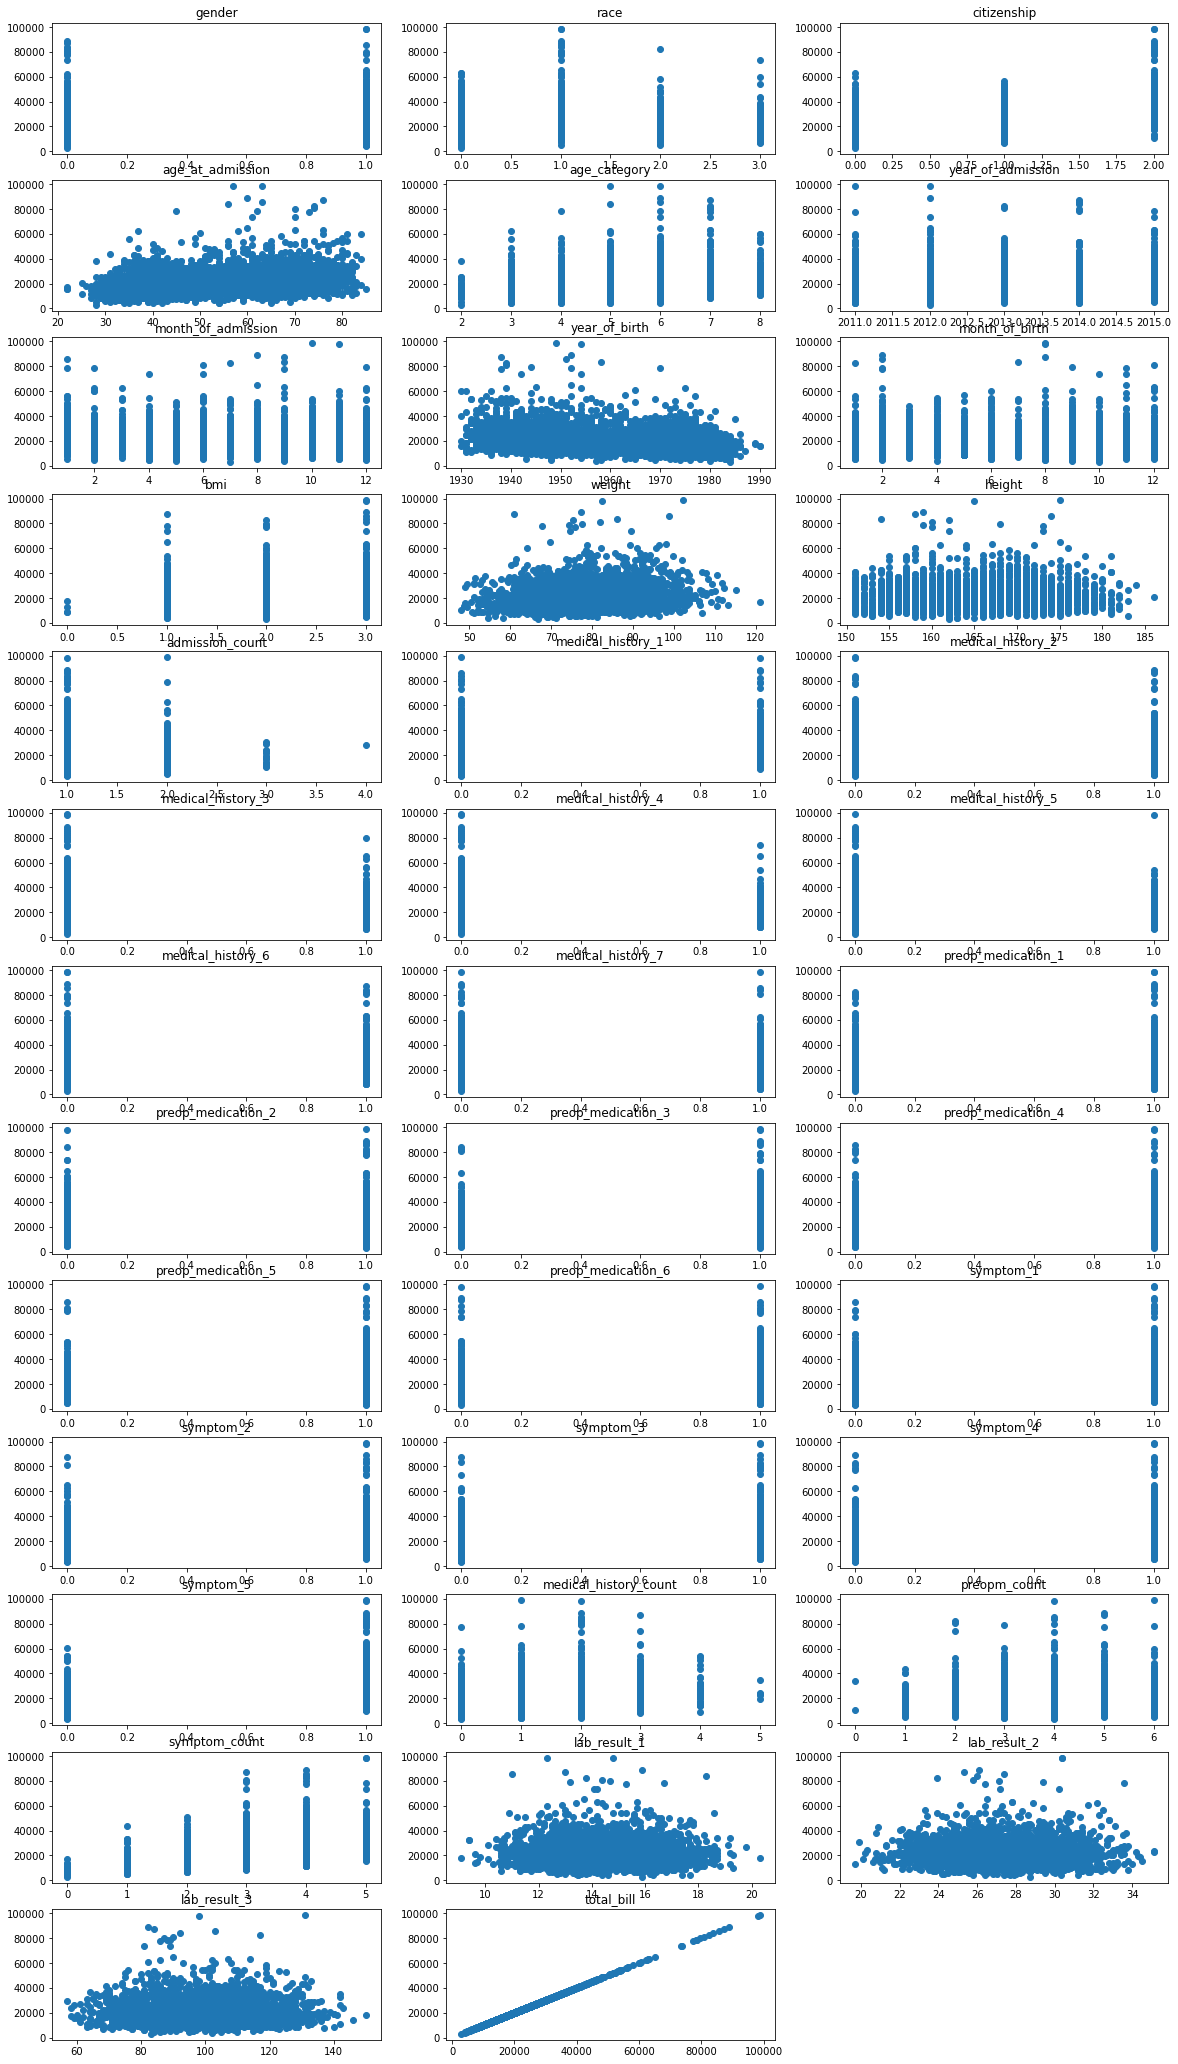

In [46]:
# Scatterplot
fig = plt.figure(2)
fig.set_figheight(40)
fig.set_figwidth(20)
columns = 3
rows = 14

for i in range(len(work_on.columns)):
    fig.add_subplot(rows, columns, i+1)
    plt.scatter(work_on[work_on.columns[i]], work_on["total_bill"])
    plt.title(work_on.columns[i])
    
# plt.tight_layout()
plt.show()

We don't see any obvious relationship between total bill and the other factors from here

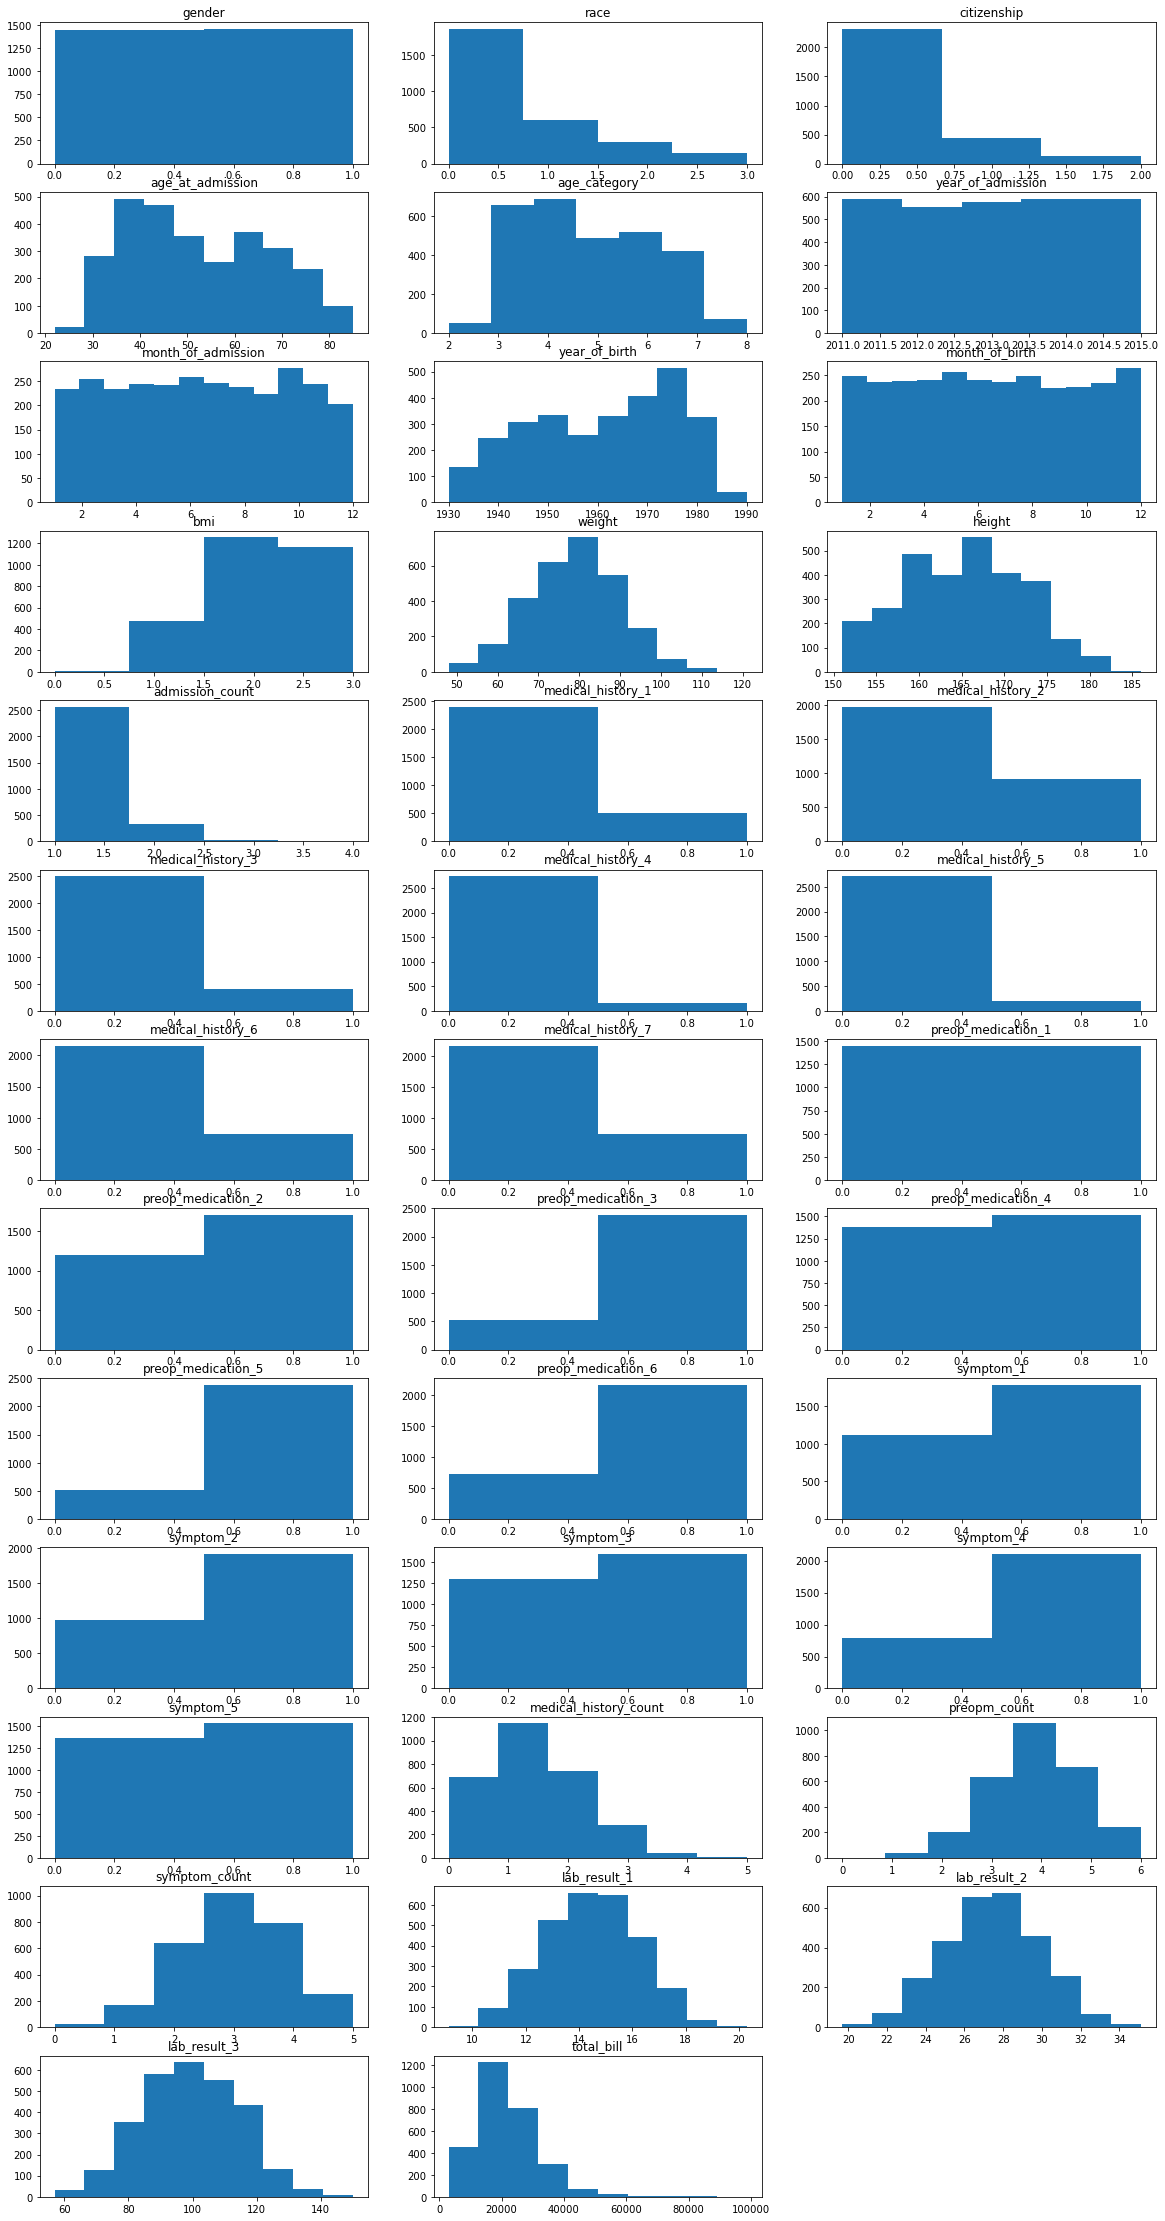

In [47]:
# Histogram
fig = plt.figure(1)
fig.set_figheight(40)
fig.set_figwidth(20)
columns = 3
rows = 13

for i in range(len(work_on.columns)):
    fig.add_subplot(rows, columns, i+1)
    if len(work_on[work_on.columns[i]].unique()) < 15:
        bins = len(work_on[work_on.columns[i]].unique())
        plt.hist(work_on[work_on.columns[i]], bins = bins)
    else: 
        plt.hist(work_on[work_on.columns[i]])
    plt.title(work_on.columns[i])
    
# plt.tight_layout()
plt.show()

In [48]:
pd.options.display.max_columns = 100
work_on.describe(include="all")

,gender,race,citizenship,age_at_admission,age_category,year_of_admission,month_of_admission,year_of_birth,month_of_birth,bmi,weight,height,admission_count,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,medical_history_count,preopm_count,symptom_count,lab_result_1,lab_result_2,lab_result_3,total_bill
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
mean,0.501725,0.565217,0.248792,52.432712,4.801587,2013.015528,6.454451,1960.582816,6.494479,2.233954,78.860041,165.133540,1.123188,0.171498,0.317460,0.137336,0.054520,0.064872,0.256384,0.253968,0.500345,0.587647,0.821601,0.522429,0.823671,0.749137,0.615942,0.661836,0.550380,0.725673,0.528295,1.256039,4.004831,3.082126,14.458109,27.421843,99.517253,21945.900483
std,0.500083,0.871870,0.531253,14.680246,1.499156,1.422039,3.410196,14.599174,3.471985,0.718458,11.033373,7.032675,0.348091,0.377008,0.465569,0.344261,0.227081,0.246343,0.436711,0.435355,0.500086,0.492343,0.382914,0.499583,0.381165,0.433584,0.486456,0.473166,0.497541,0.446252,0.499285,0.980659,1.106658,1.069948,1.746524,2.483794,15.297303,10316.927510
min,0.000000,0.000000,0.000000,22.000000,2.000000,2011.000000,1.000000,1930.000000,1.000000,0.000000,48.000000,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,57.000000,2946.100000
25%,0.000000,0.000000,0.000000,40.000000,4.000000,2012.000000,4.000000,1948.000000,4.000000,2.000000,71.300000,160.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,13.200000,25.700000,88.000000,14887.250000
50%,1.000000,0.000000,0.000000,50.000000,5.000000,2013.000000,6.000000,1962.500000,6.000000,2.000000,79.000000,165.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,14.400000,27.400000,100.000000,20163.250000
75%,1.000000,1.000000,0.000000,65.000000,6.000000,2014.000000,9.000000,1973.000000,10.000000,3.000000,86.375000,171.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,4.000000,15.700000,29.200000,110.000000,26810.090000
max,1.000000,3.000000,2.000000,85.000000,8.000000,2015.000000,12.000000,1990.000000,12.000000,3.000000,121.000000,186.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,5.000000,20.300000,35.100000,150.000000,98723.860000


### Discrete variables

Now let's look at each discrete variable, and see if there are any significant differences

In [49]:
work_on.dtypes

gender                     int64
race                       int64
citizenship                int64
age_at_admission           int64
age_category               int64
year_of_admission          int64
month_of_admission         int64
year_of_birth              int64
month_of_birth             int64
bmi                        int64
weight                   float64
height                     int64
admission_count            int64
medical_history_1          int64
medical_history_2          int64
medical_history_3          int64
medical_history_4          int64
medical_history_5          int64
medical_history_6          int64
medical_history_7          int64
preop_medication_1         int64
preop_medication_2         int64
preop_medication_3         int64
preop_medication_4         int64
preop_medication_5         int64
preop_medication_6         int64
symptom_1                  int64
symptom_2                  int64
symptom_3                  int64
symptom_4                  int64
symptom_5 

segregate function to help with segregating by a variable
Takes in a:
- column: column name that we want to segregate
- dataframe: pandas dataframe that we will get the data from
- look_at: the variable name that we want to compare across the segregated groups

Outputs the mean, std, and table of p-values

In [50]:
# Function to get mean and std of each unique value in a column,
# and get between group p-value

def segregate(column, dataframe, look_at):
    values = dataframe[column].unique()
    values.sort()
    mean = []
    std = []
    dfs = []
    p_values = [[0 for i in range(len(values))] for j in range(len(values))]
    print(column)
    for i in range(len(values)):
        df = dataframe[dataframe[column]==values[i]]
        dfs.append(df[look_at])
        
        # Calculate mean and std
        mean.append(df[look_at].mean())
        std.append(df[look_at].std())
        print(f"{values[i]} bill mean: {mean[-1]}, {values[i]} bill std:, {std[-1]}")
        
        # Calculate t-test between groups
        j = i
        while j >= 0:
            p_values[i][j] = stats.ttest_ind(a=dfs[i], b=dfs[j], equal_var=False)[1]
            p_values[j][i] = p_values[i][j]
            j -= 1
    
    # Print out p-value table
    p = pd.DataFrame(p_values, columns=values)
    p.index = values
    print(p)
    
    print("")
        

In [51]:
females = work_on[work_on["gender"]==0]
males = work_on[work_on["gender"]==1]
print(stats.ttest_ind(a=females["total_bill"], b=males["total_bill"], equal_var=True))

Ttest_indResult(statistic=-3.092092244086648, pvalue=0.0020064354923776764)


In [52]:
# Let's look at all the categorical variables at once

categories = ['gender', 'race', 'citizenship', 'year_of_admission', 'age_category',
              'month_of_admission', 'bmi', 'admission_count',
              'medical_history_1', 'medical_history_2', 'medical_history_3',
              'medical_history_4', 'medical_history_5', 'medical_history_6',
              'medical_history_7', 'preop_medication_1', 'preop_medication_2',
              'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
              'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
              'symptom_4', 'symptom_5', 'medical_history_count', 
              'preopm_count', 'symptom_count']

for category in categories:
    segregate(category, work_on, "total_bill")

gender
0 bill mean: 21352.139736842095, 0 bill std:, 10234.013746453225
1 bill mean: 22535.577592847323, 1 bill std:, 10368.517258404354
          0         1
0  1.000000  0.002005
1  0.002005  1.000000

race
0 bill mean: 19108.402506738526, 0 bill std:, 7925.222876052958
1 bill mean: 29920.94854515049, 1 bill std:, 12829.662145540751
2 bill mean: 23894.312542372874, 2 bill std:, 9243.60735515768
3 bill mean: 21410.55680000002, 3 bill std:, 9826.262682349516
              0             1             2             3
0  1.000000e+00  1.632621e-68  8.994168e-16  5.774654e-03
1  1.632621e-68  1.000000e+00  3.948870e-15  7.215219e-17
2  8.994168e-16  3.948870e-15  1.000000e+00  1.065224e-02
3  5.774654e-03  7.215219e-17  1.065224e-02  1.000000e+00

citizenship
0 bill mean: 20184.59049676031, 0 bill std:, 8171.434537460525
1 bill mean: 24869.937258426966, 1 bill std:, 9603.53155596999
2 bill mean: 42063.55449275362, 2 bill std:, 18335.01747080778
              0             1             2
0

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3 bill mean: 25199.81838709677, 3 bill std:, 10856.469241514598
4 bill mean: 26497.847948717943, 4 bill std:, 11162.517759230801
5 bill mean: 24680.420000000002, 5 bill std:, 5713.283959790552
              0             1             2             3         4         5
0  1.000000e+00  2.135273e-05  1.596513e-17  9.163650e-15  0.000326  0.105747
1  2.135273e-05  1.000000e+00  5.829483e-08  3.405158e-08  0.005642  0.245859
2  1.596513e-17  5.829483e-08  1.000000e+00  1.343898e-01  0.186595  0.813312
3  9.163650e-15  3.405158e-08  1.343898e-01  1.000000e+00  0.498177  0.852343
4  3.260615e-04  5.641866e-03  1.865952e-01  4.981774e-01  1.000000  0.574867
5  1.057472e-01  2.458595e-01  8.133123e-01  8.523433e-01  0.574867  1.000000

preopm_count
0 bill mean: 22350.335, 0 bill std:, 16765.339147373368
1 bill mean: 20575.265609756098, 1 bill std:, 9548.082945619777
2 bill mean: 21010.06038647343, 2 bill std:, 11443.00655968369
3 bill mean: 21787.50492163009, 3 bill std:, 9790.473748030656
4

In [53]:
segregate("symptom_5", work_on, "total_bill")

symptom_5
0 bill mean: 16366.538215069491, 0 bill std:, 6957.975176474309
1 bill mean: 26927.6040888308, 1 bill std:, 10279.489976742652
               0              1
0   1.000000e+00  9.876083e-198
1  9.876083e-198   1.000000e+00



One of the patients visited the hospital 4 times!

Though we see that the mean bill cost for 3 admission_count is lower than that for 2 admission_count, the sample size for 3 is quite low.

In [54]:
work_on["admission_count"].value_counts()

1    2559
2     322
3      16
4       1
Name: admission_count, dtype: int64

Medical_history_count of 5 and symptom_count of 0 also has strangely low standard deviations. This is due to their small sample size, making the result less reliable

In [55]:
work_on["medical_history_count"].value_counts()

1    1146
2     738
0     691
3     279
4      39
5       5
Name: medical_history_count, dtype: int64

In [56]:
work_on["symptom_count"].value_counts()

3    1020
4     791
2     641
5     251
1     171
0      24
Name: symptom_count, dtype: int64

In [57]:
work_on.columns

Index(['gender', 'race', 'citizenship', 'age_at_admission', 'age_category',
       'year_of_admission', 'month_of_admission', 'year_of_birth',
       'month_of_birth', 'bmi', 'weight', 'height', 'admission_count',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'medical_history_count', 'preopm_count',
       'symptom_count', 'lab_result_1', 'lab_result_2', 'lab_result_3',
       'total_bill'],
      dtype='object')

### Continuous variables

Here we have: age_at_admission, lab_result_1, lab_result_2, lab_result_3

In [58]:
work_on.columns

Index(['gender', 'race', 'citizenship', 'age_at_admission', 'age_category',
       'year_of_admission', 'month_of_admission', 'year_of_birth',
       'month_of_birth', 'bmi', 'weight', 'height', 'admission_count',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'medical_history_count', 'preopm_count',
       'symptom_count', 'lab_result_1', 'lab_result_2', 'lab_result_3',
       'total_bill'],
      dtype='object')

In [59]:
# Let's do boxplots
work_on["age_at_admission"].describe()

count    2898.000000
mean       52.432712
std        14.680246
min        22.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age_at_admission, dtype: float64

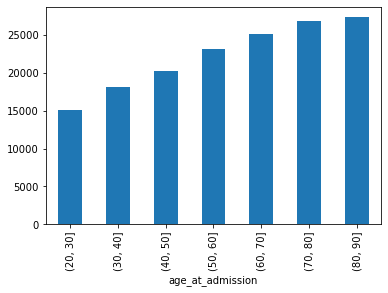

In [60]:
# Look at means
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]

age_grouped = work_on.groupby(pd.cut(work_on.age_at_admission, age_bins)).total_bill.mean().plot.bar()

In [61]:
!pip install statannotations

In [62]:
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation

#### Age VS Bill cost

In [63]:
# Test for normality
for age in work_on["age_category"].unique():
    df = work_on[work_on["age_category"] == age]
    k2, p = stats.normaltest(df["total_bill"])
    print(f"{age}: {p}")

3: 3.815314134555377e-36
6: 3.300540926117702e-53
4: 2.4036522193733397e-43
7: 5.849044778302126e-36
5: 3.794613664241376e-50
2: 0.00019653660131923397
8: 0.0032647291563637566


All p-values are < 0.05, so they are normally distributed

In [64]:
# Add t-test statistics
pairs = []
p_values = []
for i in range(len(work_on["age_category"].unique())-1):
    pairs.append((str(i+2), str(i+3)))
    df_1 = work_on[work_on["age_category"] == str(i+2)]
    df_2 = work_on[work_on["age_category"] == str(i+3)]
    p_values.append(stats.ttest_ind(a=df_1["total_bill"], 
                                    b=df_2["total_bill"], equal_var=False)[1])
    
p_values

[nan, nan, nan, nan, nan, nan]

In [65]:
work_on["age_category"] = work_on["age_category"].astype(str)

2 vs. 3: Custom statistical test, P_val:nan
3 vs. 4: Custom statistical test, P_val:nan
4 vs. 5: Custom statistical test, P_val:nan
5 vs. 6: Custom statistical test, P_val:nan
6 vs. 7: Custom statistical test, P_val:nan
7 vs. 8: Custom statistical test, P_val:nan


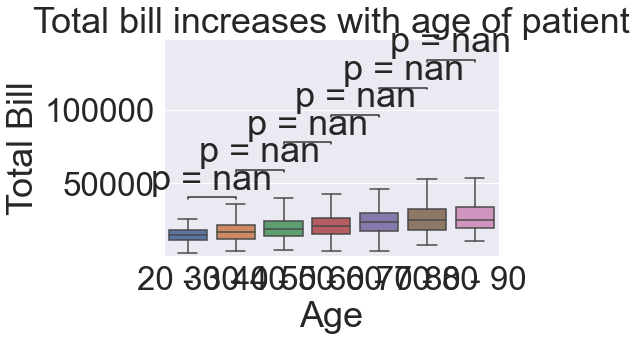

In [66]:
# Plot boxplot
sns.set(font_scale = 3)

order = ['2', '3', '4', '5', '6', '7', '8']

ax = sns.boxplot(x="age_category", y="total_bill", order=order, 
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Age")
ax.set_xticklabels(["20 - 30", "30 - 40", "40 - 50", "50 - 60", "60 - 70", 
                    "70 - 80", "80 - 90"])
ax.set_title("Total bill increases with age of patient")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x="age_category", y="total_bill", 
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

#### Lab results VS Bill cost

In [67]:
lab_results = ['lab_result_1', 'lab_result_2', 'lab_result_3']
work_on[lab_results].dtypes

lab_result_1    float64
lab_result_2    float64
lab_result_3      int64
dtype: object

In [68]:
# Let's look at the range of values
work_on[lab_results].describe()

,lab_result_1,lab_result_2,lab_result_3
count,2898.000000,2898.000000,2898.000000
mean,14.458109,27.421843,99.517253
std,1.746524,2.483794,15.297303
min,9.100000,19.700000,57.000000
25%,13.200000,25.700000,88.000000
50%,14.400000,27.400000,100.000000
75%,15.700000,29.200000,110.000000
max,20.300000,35.100000,150.000000


* Lab result 1 range: 9.1 to 20.3
* Lab result 2 range: 19.7 to 35.1
* Lab result 3 range: 57 to 150

<AxesSubplot:xlabel='lab_result_3', ylabel='total_bill'>

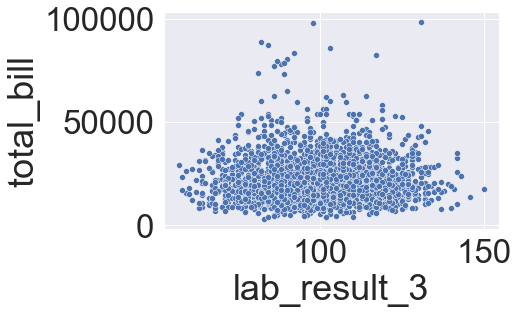

In [69]:
# Scatterplots dont give us much insights into the data
sns.scatterplot(data=work_on, x="lab_result_3", y="total_bill")

In [70]:
# We discretise it again and use boxplots
lab_1_bin = work_on["lab_result_1"].apply(lambda x: int(x) // 2)
lab_2_bin = work_on["lab_result_2"].apply(lambda x: int(x) // 3)
lab_3_bin = work_on["lab_result_3"].apply(lambda x: int(x) // 10)

work_on["lab_1_bin"] = lab_1_bin
work_on["lab_2_bin"] = lab_2_bin
work_on["lab_3_bin"] = lab_3_bin

lab_3_bin.value_counts()

10    686
9     627
8     525
11    493
12    224
7     221
6      55
13     51
14     10
5       5
15      1
Name: lab_result_3, dtype: int64

For the extremities, might be better to discretise them by > or < a value

In [71]:
# Let's do them individually
# Lab_result_1 - < 6 and > 8
work_on.loc[(work_on.lab_1_bin) < 6, "lab_1_bin"] = 5
work_on.loc[(work_on.lab_1_bin) > 8, "lab_1_bin"] = 9

# Lab_result_2 - < 8 and > 9
work_on.loc[(work_on.lab_2_bin) < 8, "lab_2_bin"] = 7
work_on.loc[(work_on.lab_2_bin) > 9, "lab_2_bin"] = 10

# Lab_result_3 - < 8 and > 12
work_on.loc[(work_on.lab_3_bin) < 8, "lab_3_bin"] = 7
work_on.loc[(work_on.lab_3_bin) > 12, "lab_3_bin"] = 13

In [72]:
# Convert them to type str
work_on["lab_1_bin"] = work_on["lab_1_bin"].astype(str)
work_on["lab_2_bin"] = work_on["lab_2_bin"].astype(str)
work_on["lab_3_bin"] = work_on["lab_3_bin"].astype(str)

In [73]:
# Test for normality
for result in work_on["lab_3_bin"].unique():
    df = work_on[work_on["lab_3_bin"] == result]
    k2, p = stats.normaltest(df["total_bill"])
    print(p)

1.9033689989726392e-71
3.723304930796094e-40
3.106556803745391e-07
7.212407120506499e-57
1.6703085123591668e-06
7.01012227844339e-27
1.0511190361175049e-15


In [74]:
# Statistics for annotation later
which_lab = 3
_result = "lab_" + str(which_lab) + "_bin"
values = list(work_on[_result].unique())
values.sort()

pairs = []
p_values = []
for i in range(len(values)-1):
    pairs.append((str(values[i]), str(values[i+1])))
    df_1 = work_on[work_on[_result] == str(values[i])]
    df_2 = work_on[work_on[_result] == str(values[i+1])]
    p_values.append(stats.ttest_ind(a=df_1["total_bill"], 
                                    b=df_2["total_bill"], equal_var=False)[1])
    
p_values

[0.1491565518521571,
 0.06649946816211291,
 0.329328210425309,
 0.363936475348569,
 0.09618838193975969,
 0.05867321765198467]

In [75]:
# Function to make calculating p-values and storing pairs easier
def calculate_pairs_n_pvalue(variable, df, test_normal=False):
    values = list(df[variable].unique())
    values.sort()
    df[variable] = df[variable].astype(str)
    pairs = []
    p_values = []
    
    # Update pairs and p_values
    for i in range(len(values)-1):
        pairs.append((str(values[i]), str(values[i+1])))
        df_1 = work_on[work_on[variable] == str(values[i])]
        df_2 = work_on[work_on[variable] == str(values[i+1])]
        p_values.append(stats.ttest_ind(a=df_1["total_bill"], 
                                        b=df_2["total_bill"], equal_var=False)[1])
    
        # Check normality
        if test_normal:
            k2_1, p1 = stats.normaltest(df_1["total_bill"])
            k2_2, p2 = stats.normaltest(df_2["total_bill"])
            if p1 > 0.05:
                print(f"Not normal: {variable}, {values[i]}")
            if p2 > 0.05:
                print(f"Not normal: {variable}, {values[i+1]}")
            
    return pairs, p_values, [str(x) for x in values]

10 vs. 11: Custom statistical test, P_val:1.492e-01
11 vs. 12: Custom statistical test, P_val:6.650e-02
12 vs. 13: Custom statistical test, P_val:3.293e-01
13 vs. 7: Custom statistical test, P_val:3.639e-01
7 vs. 8: Custom statistical test, P_val:9.619e-02
8 vs. 9: Custom statistical test, P_val:5.867e-02


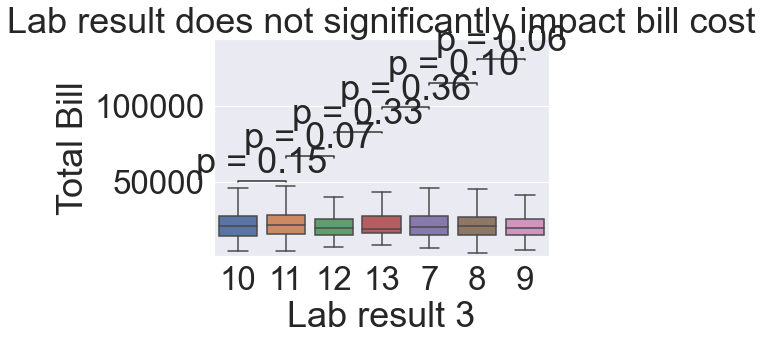

In [76]:
# pairs, p_values = calculate_pairs_n_pvalue(_result, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=_result, y="total_bill", order=values, 
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Lab result " + str(which_lab))
# ax.set_xticklabels(["20 - 30", "30 - 40", "40 - 50", "50 - 60", "60 - 70", 
#                     "70 - 80", "80 - 90"])
ax.set_title("Lab result does not significantly impact bill cost")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=_result, y="total_bill", 
                      order=values)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

Findings: bill cost is not significantly impacted by lab result!

## Generate figures for presentation

Factors that are interesting to look at:
- Age
- Gender
- Race
- Year of admission
- Admission count
- Medical histories + count
- Lab results
- Symptoms + count
- Citizenship
- Do clustering

### Gender

0 vs. 1: Custom statistical test, P_val:2.005e-03


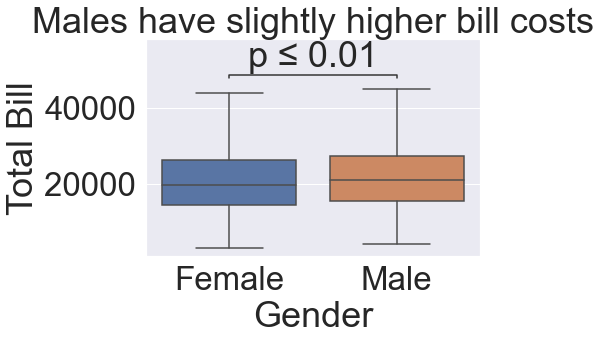

In [77]:
pairs = [('0', '1')]
p_values = []
work_on["gender"] = work_on["gender"].astype(str)
df_1 = work_on[work_on["gender"] == '0']
df_2 = work_on[work_on["gender"] == '1']
p_values.append(stats.ttest_ind(a=df_1["total_bill"], 
                                b=df_2["total_bill"], equal_var=False)[1])

sns.set(font_scale = 3)

ax = sns.boxplot(x="gender", y="total_bill", 
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Gender")
ax.set_xticklabels(["Female", "Male"])
ax.set_title("Males have slightly higher bill costs")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x="gender", y="total_bill")
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Race

In [78]:
work_on["race"].value_counts()

0    1855
1     598
2     295
3     150
Name: race, dtype: int64

0 vs. 1: Custom statistical test, P_val:1.633e-68
1 vs. 2: Custom statistical test, P_val:3.949e-15
2 vs. 3: Custom statistical test, P_val:1.065e-02


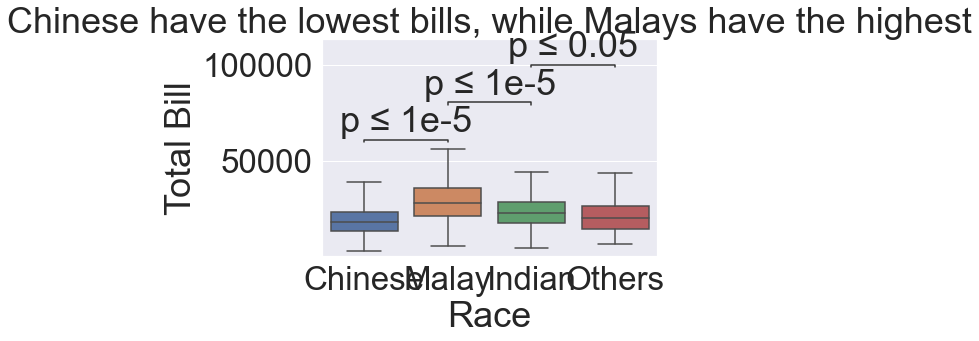

In [79]:
variable = "race"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Race")
ax.set_xticklabels(["Chinese", "Malay", "Indian", "Others"])
ax.set_title("Chinese have the lowest bills, while Malays have the highest")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Admission count

In [80]:
work_on["admission_count"].value_counts()

1    2559
2     322
3      16
4       1
Name: admission_count, dtype: int64

In [81]:
# Convert the only 4 into a 3 for convenience
work_on.loc[work_on["admission_count"] == '4', "admission_count"] = '3'

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

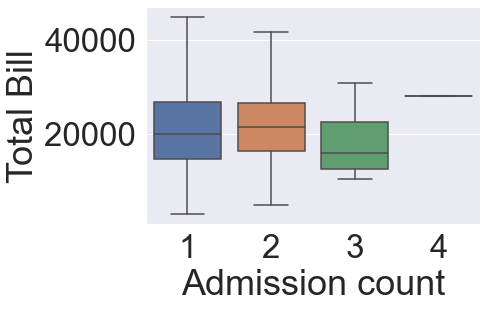

In [82]:
variable = "admission_count"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill",
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Admission count")
ax.set_xticklabels(["1", "2", "> 2"])
ax.set_title("Admission count does not seem to affect bill cost")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill")
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Year

2011 vs. 2012: Custom statistical test, P_val:6.672e-01
2012 vs. 2013: Custom statistical test, P_val:5.647e-01
2013 vs. 2014: Custom statistical test, P_val:2.864e-01
2014 vs. 2015: Custom statistical test, P_val:8.964e-02


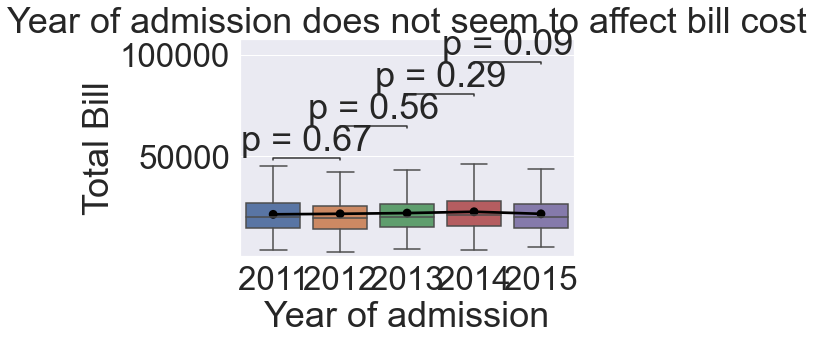

In [83]:
variable = "year_of_admission"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax = sns.pointplot(x=variable, y="total_bill", order=order, data=work_on, 
                   color='black')
ax.set_ylabel("Total Bill")
ax.set_xlabel("Year of admission")
ax.set_title("Year of admission does not seem to affect bill cost")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Medical histories

C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


0 vs. 1: Custom statistical test, P_val:2.135e-05
1 vs. 2: Custom statistical test, P_val:5.829e-08
2 vs. 3: Custom statistical test, P_val:1.344e-01
3 vs. 4: Custom statistical test, P_val:4.982e-01
4 vs. 5: Custom statistical test, P_val:5.749e-01


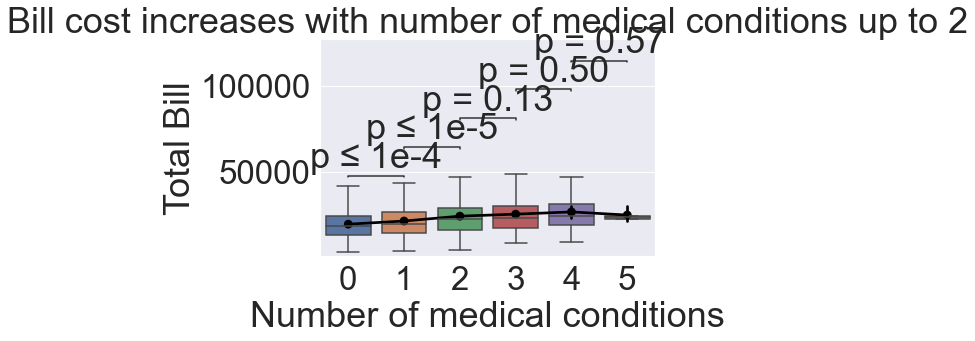

In [84]:
variable = "medical_history_count"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax = sns.pointplot(x=variable, y="total_bill", order=order, data=work_on, 
                   color='black')
ax.set_ylabel("Total Bill")
ax.set_xlabel("Number of medical conditions")
# ax.set_xticklabels(["Chinese", "Malay", "Indian", "Others"])
ax.set_title("Bill cost increases with number of medical conditions up to 2")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Symptoms

C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


0 vs. 1: Custom statistical test, P_val:2.970e-06
1 vs. 2: Custom statistical test, P_val:3.274e-16
2 vs. 3: Custom statistical test, P_val:7.064e-31
3 vs. 4: Custom statistical test, P_val:2.750e-28
4 vs. 5: Custom statistical test, P_val:2.602e-10


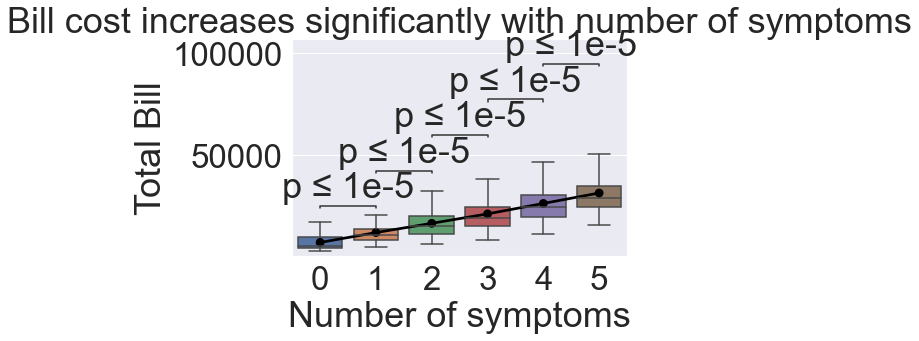

In [85]:
variable = "symptom_count"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax = sns.pointplot(x=variable, y="total_bill", order=order, data=work_on, 
                   color='black')
ax.set_ylabel("Total Bill")
ax.set_xlabel("Number of symptoms")
# ax.set_xticklabels(["Chinese", "Malay", "Indian", "Others"])
ax.set_title("Bill cost increases significantly with number of symptoms")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Citizenship

0 vs. 1: Custom statistical test, P_val:1.709e-20
1 vs. 2: Custom statistical test, P_val:3.535e-20


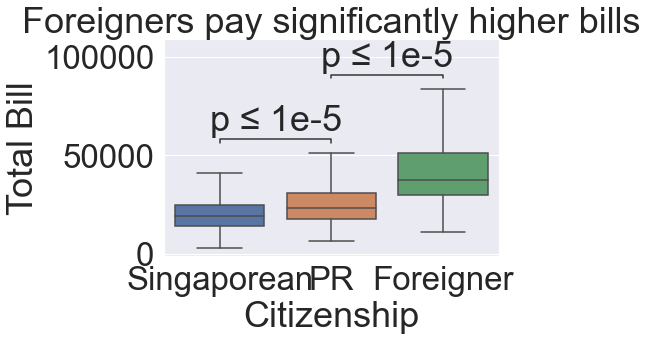

In [86]:
variable = "citizenship"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Citizenship")
ax.set_xticklabels(["Singaporean", "PR", "Foreigner"])
ax.set_title("Foreigners pay significantly higher bills")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### BMI

0 vs. 1: Custom statistical test, P_val:2.615e-02
1 vs. 2: Custom statistical test, P_val:1.904e-01
2 vs. 3: Custom statistical test, P_val:4.687e-08


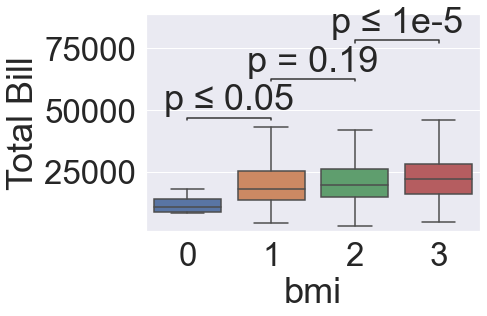

In [87]:
variable = "bmi"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
# ax.set_xlabel("Citizenship")
# ax.set_xticklabels(["Singaporean", "PR", "Foreigner"])
# ax.set_title("Foreigners pay significantly higher bills")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

## Explore features from feature importance

### Medical_history_1

0 vs. 1: Custom statistical test, P_val:5.668e-27


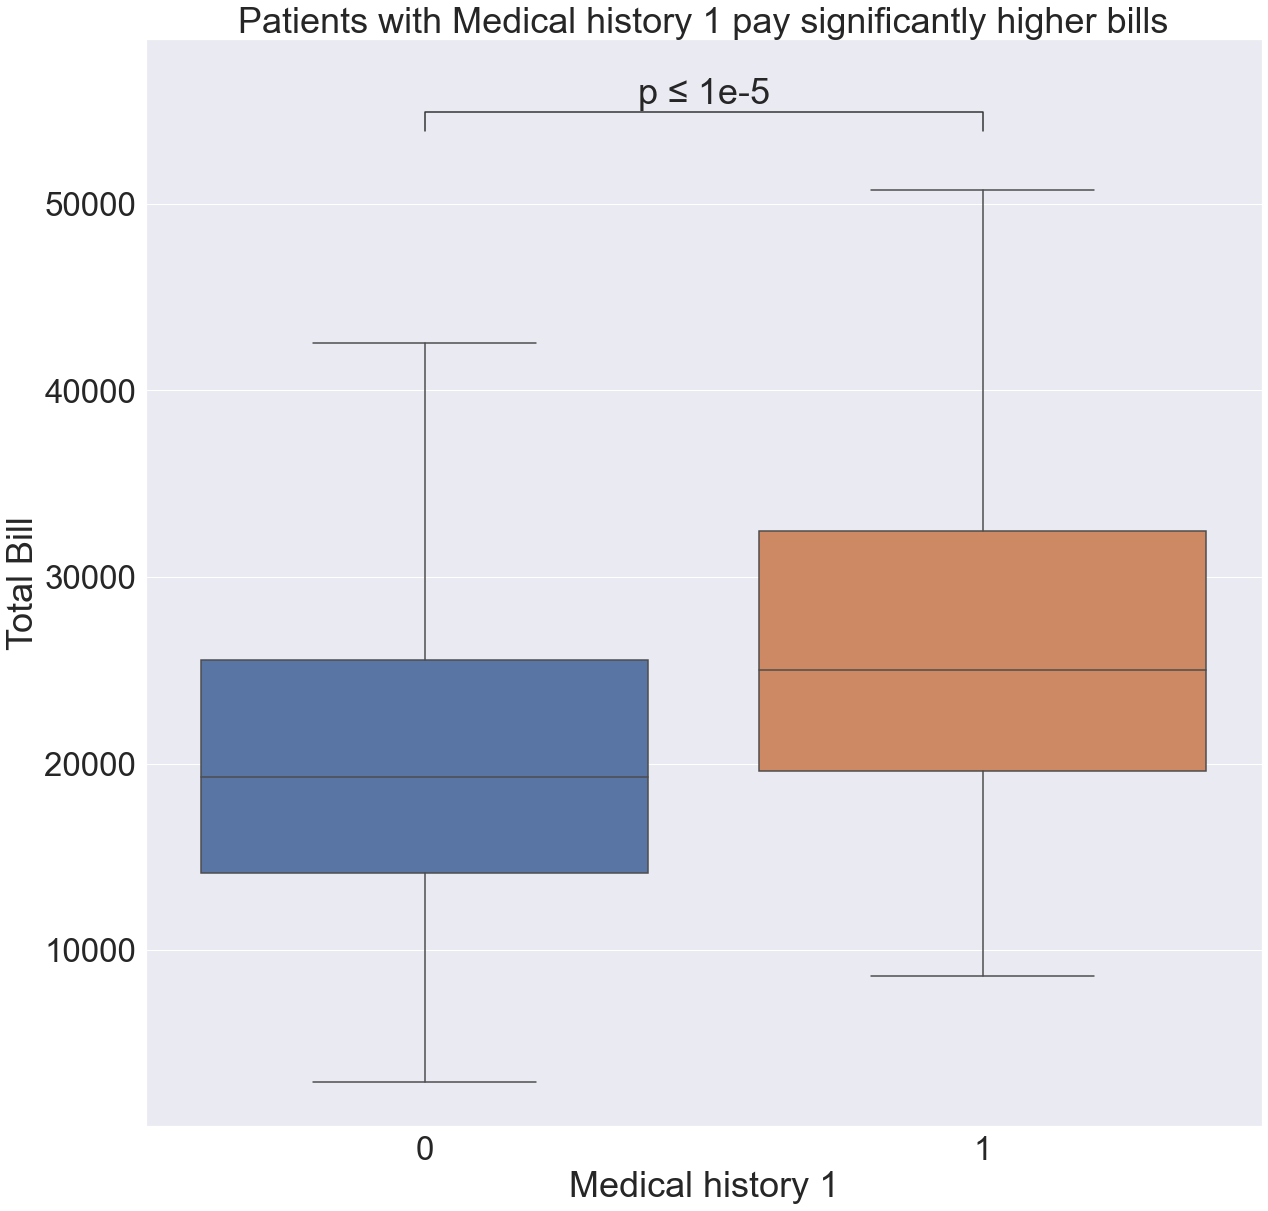

In [75]:
variable = "medical_history_1"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Medical history 1")
ax.set_title("Patients with Medical history 1 pay significantly higher bills")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

0 vs. 1: Custom statistical test, P_val:4.649e-13


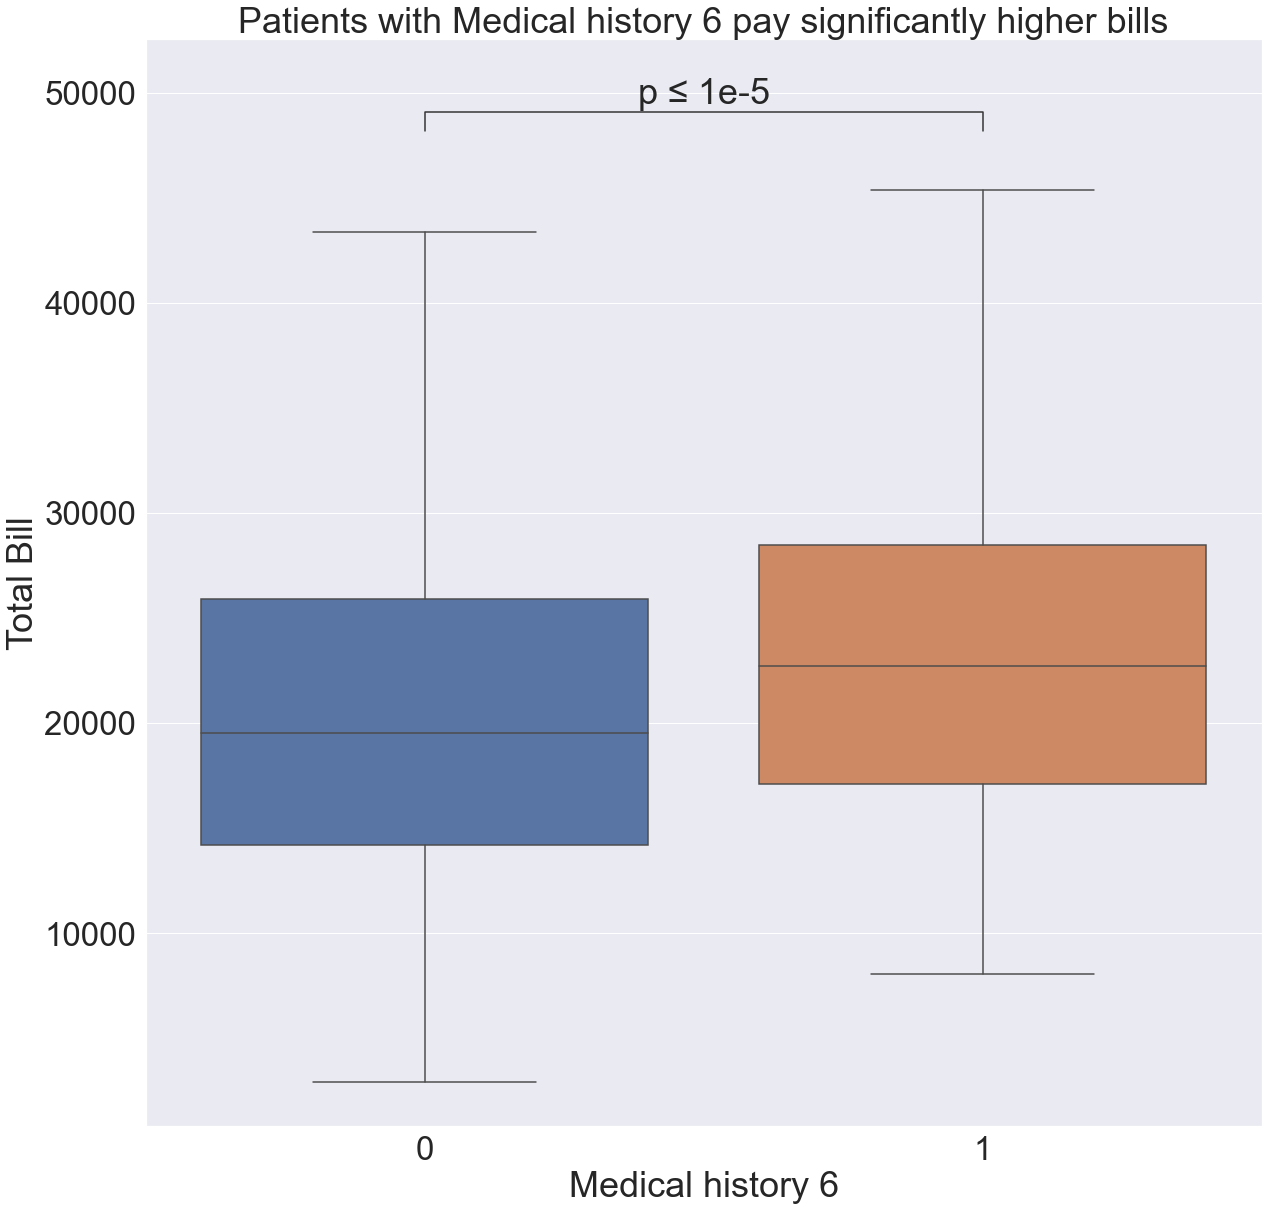

In [78]:
variable = "medical_history_6"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Medical history 6")
ax.set_title("Patients with Medical history 6 pay significantly higher bills")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()

### Symptom_5

0 vs. 1: Custom statistical test, P_val:9.876e-198


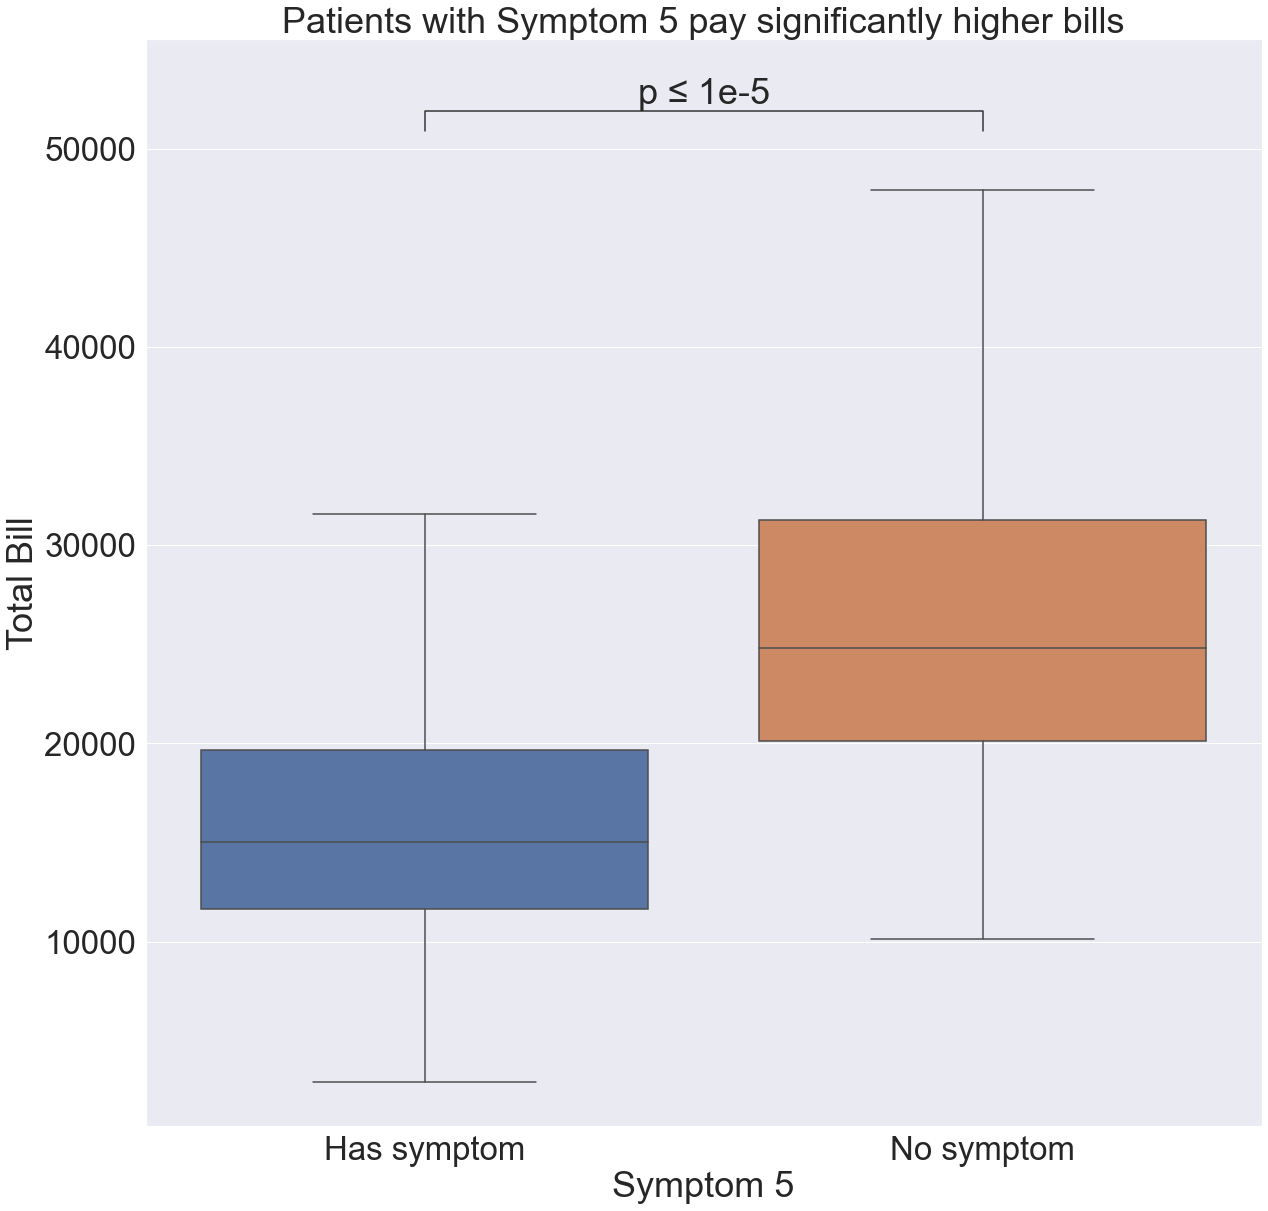

In [73]:
variable = "symptom_5"

pairs, p_values, order = calculate_pairs_n_pvalue(variable, work_on)

sns.set(font_scale = 3)

ax = sns.boxplot(x=variable, y="total_bill", order=order,
                 data=work_on, showfliers=False)
ax.set_ylabel("Total Bill")
ax.set_xlabel("Symptom 5")
ax.set_xticklabels(["Has symptom", "No symptom"])
ax.set_title("Patients with Symptom 5 pay significantly higher bills")

# Add t-test statistics
annotator = Annotator(ax, pairs, data=work_on, x=variable, y="total_bill",
                      order=order)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.show()